In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score

In [2]:
diabetes = pd.read_csv('D:/Nasila/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Missing values per column:")
print(diabetes.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


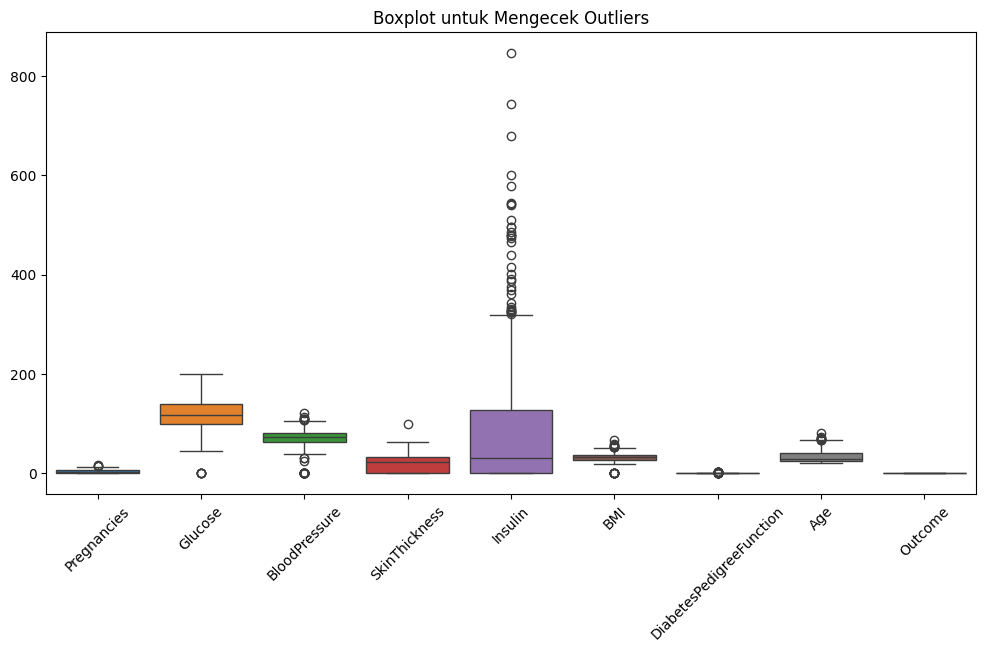

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes)
plt.title("Boxplot untuk Mengecek Outliers")
plt.xticks(rotation=45)
plt.show()

In [6]:
print("\nOverview Data:")
print(diabetes.head())


Overview Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
print("\nStatistik Deskriptif:")
print(diabetes.describe())


Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

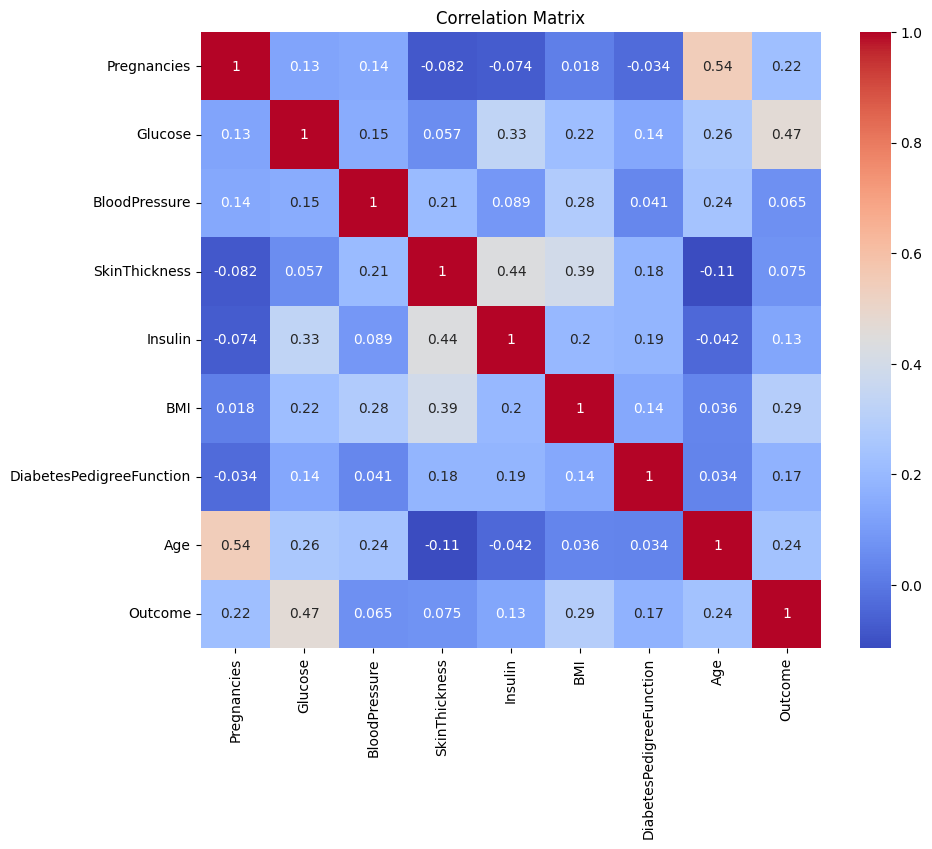

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

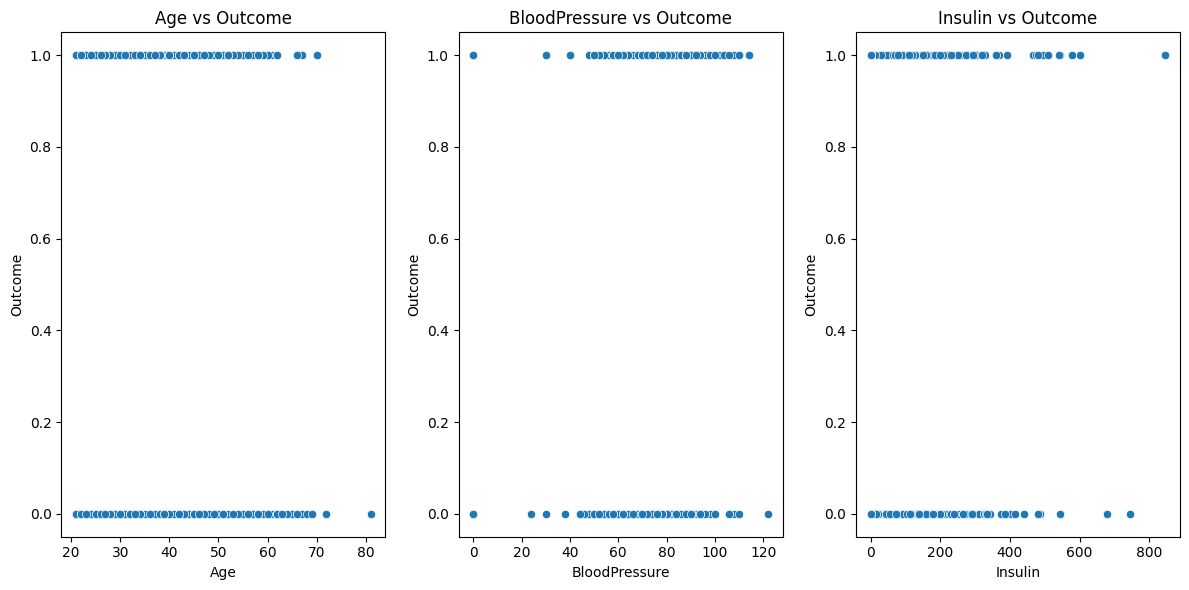

In [10]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['Age', 'BloodPressure', 'Insulin']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=diabetes, x=feature, y='Outcome')
    plt.title(f"{feature} vs Outcome")
plt.tight_layout()
plt.show()

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
y_train_class = (y_train > y_train.median()).astype(int)
y_test_class = (y_test > y_train.median()).astype(int)

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_class)

GaussianNB()

In [15]:
y_pred_nb = nb_model.predict(X_test)

In [16]:
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test_class, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



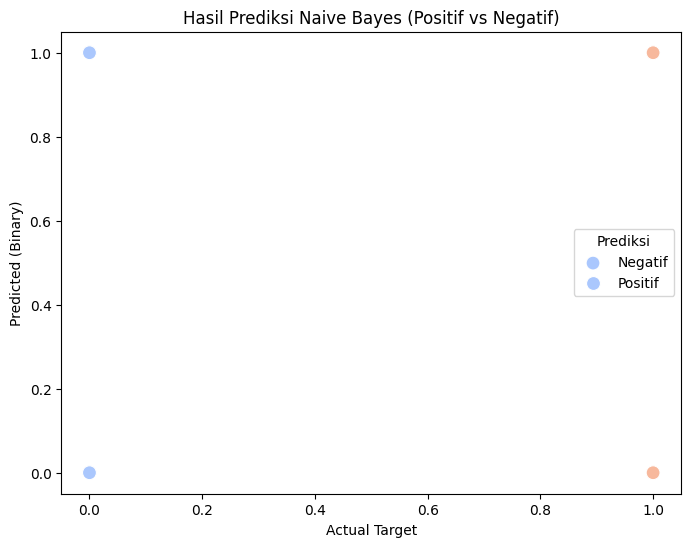

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nb, hue=y_test_class, palette="coolwarm", s=100)
plt.title("Hasil Prediksi Naive Bayes (Positif vs Negatif)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted (Binary)")
plt.legend(title="Prediksi", labels=["Negatif", "Positif"])
plt.show()

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_lr = lr_model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Linear Regression Evaluation:
Mean Squared Error (MSE): 0.17
R2 Score: 0.26


In [21]:
y_pred_lr_class = (y_pred_lr > y_train.median()).astype(int)

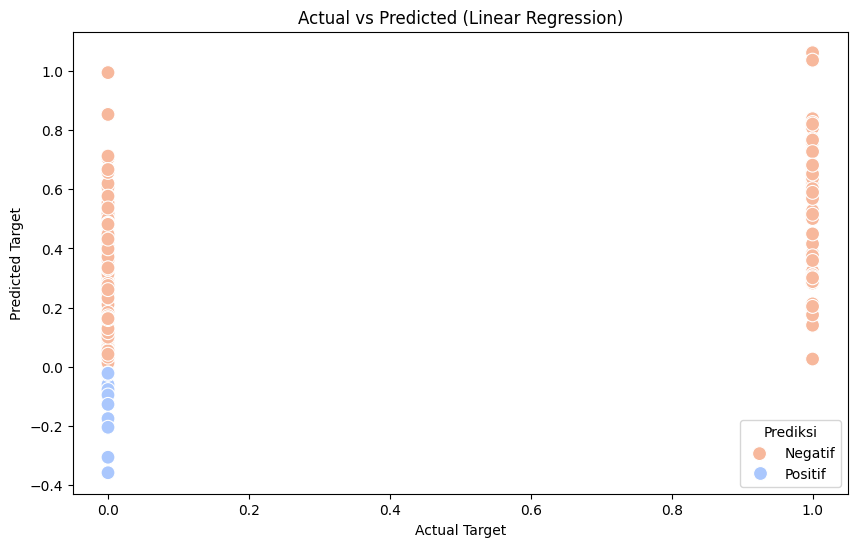

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, hue=y_pred_lr_class, palette="coolwarm", s=100)
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.legend(title="Prediksi", labels=["Negatif", "Positif"])
plt.show()

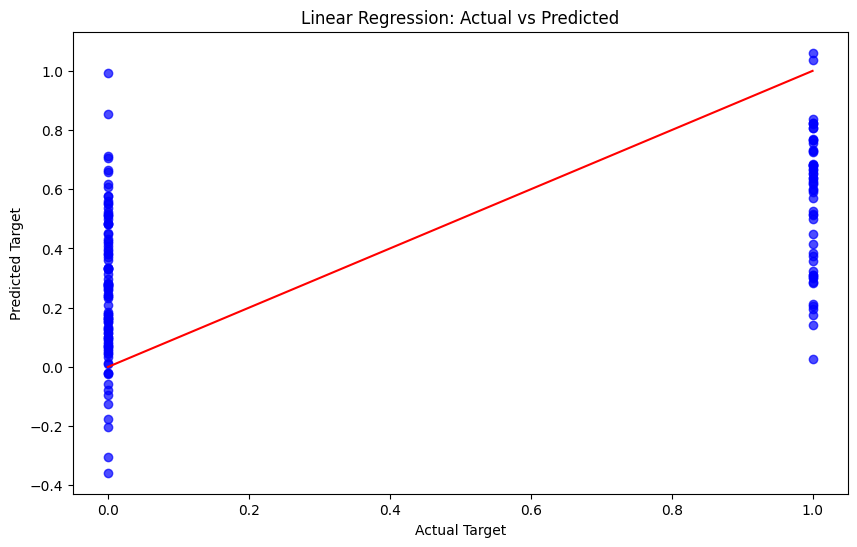

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

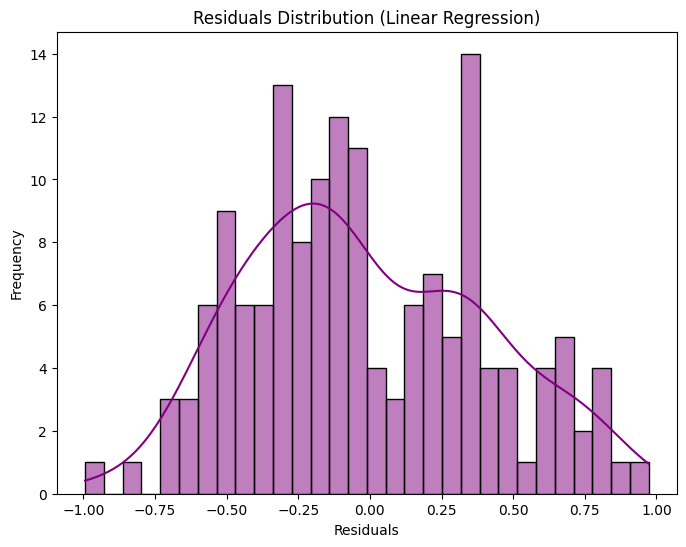

In [24]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

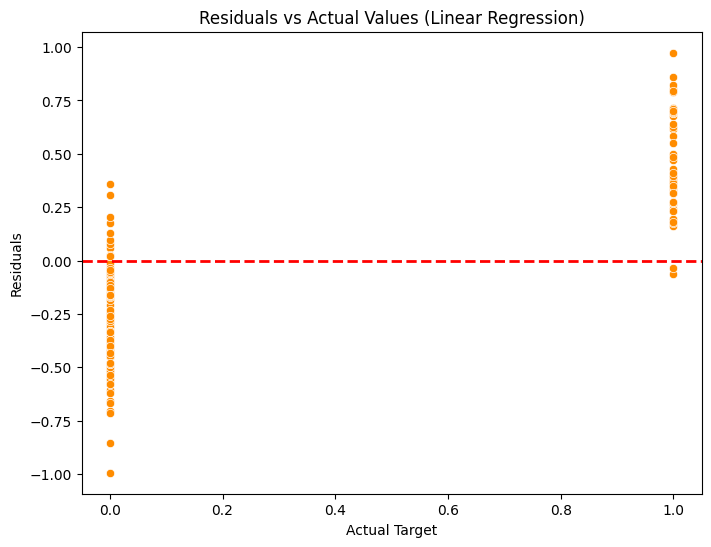

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='darkorange')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title("Residuals vs Actual Values (Linear Regression)")
plt.xlabel("Actual Target")
plt.ylabel("Residuals")
plt.show()